# Sentiment analysis

dataset source: https://www.kaggle.com/datasets/ankitkumar2635/sentiment-and-emotions-of-tweets


In [3]:
import pandas as pd

In [4]:
df= pd.read_csv("/content/sentiment-emotion-labelled_Dell_tweets.csv")

In [5]:
df.head()

,Unnamed: 0,Datetime,Tweet Id,Text,Username,sentiment,sentiment_score,emotion,emotion_score
0,0,2022-09-30 23:29:15+00:00,1575991191170342912,@Logitech @apple @Google @Microsoft @Dell @Len...,ManjuSreedaran,neutral,0.853283,anticipation,0.587121
1,1,2022-09-30 21:46:35+00:00,1575965354425131008,@MK_habit_addict @official_stier @MortalKombat...,MiKeMcDnet,neutral,0.519470,joy,0.886913
2,2,2022-09-30 21:18:02+00:00,1575958171423752203,"As @CRN celebrates its 40th anniversary, Bob F...",jfollett,positive,0.763791,joy,0.960347
3,3,2022-09-30 20:05:24+00:00,1575939891485032450,@dell your customer service is horrible especi...,daveccarr,negative,0.954023,anger,0.983203
4,4,2022-09-30 20:03:17+00:00,1575939359160750080,@zacokalo @Dell @DellCares @Dell give the man ...,heycamella,neutral,0.529170,anger,0.776124


In [6]:
df.columns

Index(['Unnamed: 0', 'Datetime', 'Tweet Id', 'Text', 'Username', 'sentiment',
       'sentiment_score', 'emotion', 'emotion_score'],
      dtype='object')

In [7]:
list_text=list(df["Text"])
list_text[0]

'@Logitech @apple @Google @Microsoft @Dell @Lenovo #WhatIf QWERTY were modified for programmers so things like brackets, parens, quotes, operators, etc. moved to the middle near G-H splitting left/right brackets to separate hands, and relieving the less dextrous pinky finger?'

In [8]:
from collections import Counter

count = Counter()
for text in df['Text']:
    for word in text.split(sep="@"):
        count[word] += 1

# Find most common 10 words from the Pandas dataframe
common_words=count.most_common(20)
common_words

[('', 14953),
 ('Dell ', 7840),
 ('MichaelDell ', 1580),
 ('DellCares ', 1095),
 ('Twitter ', 1082),
 ('elonmusk ', 1051),
 ('Microsoft ', 628),
 ('HP ', 596),
 ('Dell', 549),
 ('Alienware ', 523),
 ('Dell_IN ', 461),
 ('DellTech ', 430),
 ('starwars ', 342),
 ('TheRock ', 337),
 ('ScienceNews ', 336),
 ('steveaustinBSR\xa0 ', 334),
 ('WWEUniverse\xa0 ', 334),
 ('playstation ', 333),
 ('JohnCena #psndown ', 331),
 ('CountryMusic\xa0', 326)]

In [9]:
df_common_wd= pd.DataFrame(common_words)
df_common_wd

,0,1
0,,14953
1,Dell,7840
2,MichaelDell,1580
3,DellCares,1095
4,Twitter,1082
5,elonmusk,1051
6,Microsoft,628
7,HP,596
8,Dell,549
9,Alienware,523


In [10]:
df_common_wd.dropna()

,0,1
0,,14953
1,Dell,7840
2,MichaelDell,1580
3,DellCares,1095
4,Twitter,1082
5,elonmusk,1051
6,Microsoft,628
7,HP,596
8,Dell,549
9,Alienware,523


In [11]:
df_common_wd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       20 non-null     object
 1   1       20 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 448.0+ bytes


In [12]:
df_common_wd=df_common_wd.drop(0)

In [13]:
df_common_wd= df_common_wd.rename(columns={0: 'word'})
df_common_wd= df_common_wd.rename(columns={1: 'count'})
df_common_wd.style.background_gradient(cmap='Blues')

,word,count
1,Dell,7840
2,MichaelDell,1580
3,DellCares,1095
4,Twitter,1082
5,elonmusk,1051
6,Microsoft,628
7,HP,596
8,Dell,549
9,Alienware,523
10,Dell_IN,461


In [14]:
import plotly.express as px

fig = px.bar(df_common_wd, x="word", y="count")
fig.show()

In [15]:
fig2= px.treemap(df_common_wd, path=['word'], values='count')
fig2.show()

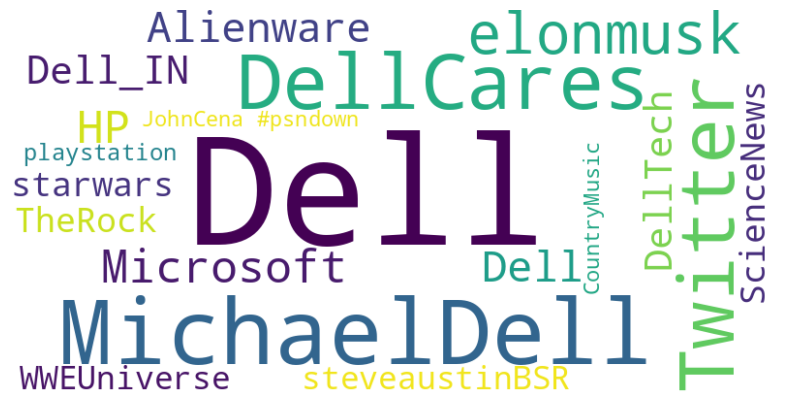

In [16]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Create a dictionary from the dataframe columns 'word' and 'count'
word_count_dict = dict(zip(df_common_wd['word'], df_common_wd['count']))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_count_dict)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


## 1-Look for the most common sentiment and emotion in both respective columns. Plot the most common words in a treemap or word count as above.

In [17]:
count = Counter()
for emo in df['emotion']:
        count[emo] += 1

# Find most common 10 words from the Pandas dataframe
common_emotions=count.most_common(20)
common_emotions

[('anger', 7520),
 ('joy', 6326),
 ('anticipation', 5171),
 ('disgust', 3000),
 ('sadness', 1328),
 ('optimism', 1225),
 ('fear', 366),
 ('surprise', 34)]

In [18]:
df_common_em= pd.DataFrame(common_emotions)
df_common_em

,0,1
0,anger,7520
1,joy,6326
2,anticipation,5171
3,disgust,3000
4,sadness,1328
5,optimism,1225
6,fear,366
7,surprise,34


In [19]:
df_common_em.dropna()
df_common_em=df_common_em.drop(0)

In [20]:
df_common_em= df_common_em.rename(columns={0: 'emotions'})
df_common_em= df_common_em.rename(columns={1: 'frequency'})
df_common_em.style.background_gradient(cmap='Blues')

,emotions,frequency
1,joy,6326
2,anticipation,5171
3,disgust,3000
4,sadness,1328
5,optimism,1225
6,fear,366
7,surprise,34


In [21]:
import plotly.express as px

fig = px.bar(df_common_em, x="emotions", y="frequency")
fig.show()

In [22]:
fig2= px.treemap(df_common_em, path=['emotions'], values='frequency')
fig2.show()

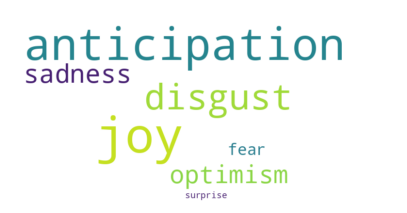

In [23]:
# Create a dictionary from the dataframe columns 'emotions' and 'frequency'
emotion_frequency_dict = dict(zip(df_common_em['emotions'], df_common_em['frequency']))

# Generate the word cloud
emotioncloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(emotion_frequency_dict)

# Plot the word cloud
plt.figure(figsize=(5, 3))
plt.imshow(emotioncloud, interpolation='bilinear')
plt.axis('off')
plt.show()


## 2- Filter out the positive sentiment's texts from the initial dataframe, count and show what are the main words from this categoty. Do the same for the negative sentiments.

In [24]:
df_positive = df.loc[df['sentiment']=='positive']

count_p = Counter()
for text_p in df_positive['Text']:
    for word_p in text_p.split(sep="@"):
        count_p[word_p] += 1

# Find most common 10 words from the Pandas dataframe
common_words_p=count_p.most_common(20)

df_common_wd_p= pd.DataFrame(common_words_p)

df_common_wd_p.dropna()
df_common_wd_p = df_common_wd_p.drop(0)

df_common_wd_p= df_common_wd_p.rename(columns={0: 'word'})
df_common_wd_p= df_common_wd_p.rename(columns={1: 'count'})
df_common_wd_p.style.background_gradient(cmap='hot')

,word,count
1,Dell,1910
2,MichaelDell,329
3,Twitter,318
4,elonmusk,292
5,Alienware,216
6,intelcanada,158
7,DellTech,143
8,intel,130
9,"Dell,",120
10,HP,111


In [25]:
df_negative = df.loc[df['sentiment']=='negative']

count_n = Counter()
for text_n in df_negative['Text']:
    for word_n in text_n.split(sep="@"):
        count_n[word_n] += 1

# Find most common 10 words from the Pandas dataframe
common_words_n=count_n.most_common(20)

df_common_wd_n= pd.DataFrame(common_words_n)

df_common_wd_n.dropna()
df_common_wd_n = df_common_wd_n.drop(0)

df_common_wd_n= df_common_wd_n.rename(columns={0: 'word'})
df_common_wd_n= df_common_wd_n.rename(columns={1: 'count'})
df_common_wd_n.style.background_gradient(cmap='hot')

,word,count
1,Dell,3058
2,DellCares,855
3,MichaelDell,552
4,Dell,337
5,Dell_IN,322
6,HP,244
7,elonmusk,212
8,Twitter,209
9,JuddLegum,163
10,NRCC,142
